<a href="https://colab.research.google.com/github/Tony-TTran/Tony-TTran/blob/main/Content_Based_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import numpy as np
import pandas as pd

In [272]:
from google.colab import drive
drive.mount('/content/drive')
cdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Sets/credits.csv', on_bad_lines='skip', engine="python")
mdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Sets/movies.csv', on_bad_lines='skip', engine="python")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
cdf

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [274]:
mdf

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

#**DATA PRE-PROCESSING**

In [275]:
print(cdf.shape)
print(mdf.shape)
mdf = mdf.rename(columns = {'id':'movie_id'})

data = pd.merge(cdf,mdf, on='movie_id')
print(data.shape)
data

(4803, 4)
(4803, 24)
(4803, 27)


,movie_id,title_x,cast_x,crew_x,index,budget,genres,homepage,keywords,original_language,...,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,cast_y,crew_y,director
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,culture clash future space war space colony so...,en,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,ocean drug abuse exotic island east india trad...,en,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,spy based on novel secret agent sequel mi6,en,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,dc comics crime fighter terrorist secret ident...,en,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,based on novel mars medallion space travel pri...,en,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",4798,220000,Action Crime Thriller,NaN,united states\u2013mexico barrier legs arms pa...,es,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",4799,9000,Comedy Romance,NaN,NaN,en,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,date love a

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast_x                4803 non-null   object 
 3   crew_x                4803 non-null   object 
 4   index                 4803 non-null   int64  
 5   budget                4803 non-null   int64  
 6   genres                4775 non-null   object 
 7   homepage              1712 non-null   object 
 8   keywords              4391 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4799 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

In [277]:
#Made the df contain relavent data needed
data = data[['movie_id','title_x','cast_x','budget','genres','original_language','production_companies','production_countries','release_date','runtime','spoken_languages','vote_average','vote_count','director','keywords','overview']]
data.isnull().sum()

movie_id                  0
title_x                   0
cast_x                    0
budget                    0
genres                   28
original_language         0
production_companies      0
production_countries      0
release_date              1
runtime                   2
spoken_languages          0
vote_average              0
vote_count                0
director                 30
keywords                412
overview                  4
dtype: int64

In [278]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4383 non-null   int64  
 1   title_x               4383 non-null   object 
 2   cast_x                4383 non-null   object 
 3   budget                4383 non-null   int64  
 4   genres                4383 non-null   object 
 5   original_language     4383 non-null   object 
 6   production_companies  4383 non-null   object 
 7   production_countries  4383 non-null   object 
 8   release_date          4383 non-null   object 
 9   runtime               4383 non-null   float64
 10  spoken_languages      4383 non-null   object 
 11  vote_average          4383 non-null   float64
 12  vote_count            4383 non-null   int64  
 13  director              4383 non-null   object 
 14  keywords              4383 non-null   object 
 15  overview             

<ipython-input-278-9529224e9d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [279]:
data.duplicated().sum()
data.isnull().sum()

movie_id                0
title_x                 0
cast_x                  0
budget                  0
genres                  0
original_language       0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
director                0
keywords                0
overview                0
dtype: int64

In [280]:
data = data.rename(columns = {'title_x':'title','cast_x':'cast'})
data.head(500)

,movie_id,title,cast,budget,genres,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count,director,keywords,overview
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",237000000,Action Adventure Fantasy Science Fiction,en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,James Cameron,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",300000000,Adventure Fantasy Action,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,Gore Verbinski,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",245000000,Action Adventure Crime,en,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,Sam Mendes,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",250000000,Action Crime Drama Thriller,en,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,Christopher Nolan,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",260000000,Action Adventure Science Fiction,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,Andrew Stanton,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,584,2 Fast 2 Furious,"[{""cast_id"": 4, ""character"": ""Brian O'Conner"",...",76000000,Action Crime Thriller,en,"[{""name"": ""Mikona Productions GmbH & Co. KG"", ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-06-05,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",6.2,2028,John Singleton,miami car race sports car los angeles car,It's a major double-cross when former police o...
501,309809,The Little Prince,"[{""cast_id"": 43, ""character"": ""The Aviator (vo...",64000000,Adventure Animation Fantasy,en,"[{""name"": ""Onyx Films"", ""id"": 2203}, {""name"": ...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2015-07-29,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,756,Mark Osborne,philosophy utopia airplane adventure dystopia,Based on the best-seller book 'The Little Prin...
502,4858,The Invasion,"[{""cast_id"": 15, ""character"": ""Carol"", ""credit...",80000000,Science Fiction Thriller,en,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-08-17,99.0,"[{""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0...",5.7,359,Oliver Hirschbiegel,remake alien escape alien invasion alien infec...,"Washington, D.C. psychologist Carol Bennell an..."
503,17711,The Adventures of Rocky & Bullwinkle,"[{""cast_id"": 1, ""character"": ""Natasha"", ""credi...",76000000,Action Adventure Animation Comedy Family,en,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""

In [281]:
print(data['cast'][0])
print(data['production_companies'][0])


[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 2

In [282]:
import ast

In [283]:
#Functions
def extract_name(obj):
  names = []

  for i in ast.literal_eval(obj):
    names.append(i['name'])
  return names


In [284]:
names = ['cast','production_companies','production_countries','spoken_languages']

for name in names:
  data[name] = data[name].apply(extract_name)

data

,movie_id,title,cast,budget,genres,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count,director,keywords,overview
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",237000000,Action Adventure Fantasy Science Fiction,en,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,"[English, Español]",7.2,11800,James Cameron,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",300000000,Adventure Fantasy Action,en,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,169.0,[English],6.9,4500,Gore Verbinski,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",245000000,Action Adventure Crime,en,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466,Sam Mendes,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",250000000,Action Crime Drama Thriller,en,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,165.0,[English],7.6,9106,Christopher Nolan,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",260000000,Action Adventure Science Fiction,en,[Walt Disney Pictures],[United States of America],2012-03-07,132.0,[English],6.1,2124,Andrew Stanton,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,124606,Bang,"[Darling Narita, Peter Greene, Michael Newland...",0,Drama,en,"[Asylum Films, FM Entertainment, Eagle Eye Fil...",[United States of America],1995-09-09,98.0,[English],6.0,1,Ash Baron-Cohen,gang audition police fake homeless actress,A young woman in L.A. is having a bad day: she...
4796,14337,Primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...",7000,Science Fiction Drama Thriller,en,[Thinkfilm],[United States of America],2004-10-08,77.0,[English],6.9,658,Shane Carruth,distrust garage identity crisis time travel ti...,Friends/fledgling entrepreneurs invent a devic...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",220000,Action Crime Thriller,es,[Columbia Pictures],"[Mexico, United States of America]",1992-09-04,81.0,[Español],6.6,238,Robert Rodriguez,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",0,Comedy Drama Romance TV Movie,en,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],2013-10-13,120.0,[English],7.0,6,Scott Smith,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic..."


In [285]:
#Removing Spaces from text data
features = ['production_countries','production_companies','spoken_languages']

for feature in features:
  data[feature] = data[feature].apply(lambda x:[i.replace(" ","") for i in x])

#Sectioning Overview & Keywords with commas and removing spaces

splits = ['overview','keywords','genres','director']

for split in splits:
  data[split] = data[split].apply(lambda x:x.split())



data.head(1)

,movie_id,title,cast,budget,genres,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count,director,keywords,overview
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",237000000,"[Action, Adventure, Fantasy, Science, Fiction]",en,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,162.0,"[English, Español]",7.2,11800,"[James, Cameron]","[culture, clash, future, space, war, space, co...","[In, the, 22nd, century,, a, paraplegic, Marin..."


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4383 non-null   int64  
 1   title                 4383 non-null   object 
 2   cast                  4383 non-null   object 
 3   budget                4383 non-null   int64  
 4   genres                4383 non-null   object 
 5   original_language     4383 non-null   object 
 6   production_companies  4383 non-null   object 
 7   production_countries  4383 non-null   object 
 8   release_date          4383 non-null   object 
 9   runtime               4383 non-null   float64
 10  spoken_languages      4383 non-null   object 
 11  vote_average          4383 non-null   float64
 12  vote_count            4383 non-null   int64  
 13  director              4383 non-null   object 
 14  keywords              4383 non-null   object 
 15  overview             

In [287]:
data['summary'] = data['overview'] + data['keywords'] + data['cast'] + data['genres'] + data['director'] + data['production_companies']
#cleaned_data...
clean_data = data[['movie_id','title','summary']].copy()
clean_data['summary'] = clean_data['summary'].astype('str')
clean_data

,movie_id,title,summary
0,19995,Avatar,"['In', 'the', '22nd', 'century,', 'a', 'parapl..."
1,285,Pirates of the Caribbean: At World's End,"['Captain', 'Barbossa,', 'long', 'believed', '..."
2,206647,Spectre,"['A', 'cryptic', 'message', 'from', 'Bond’s', ..."
3,49026,The Dark Knight Rises,"['Following', 'the', 'death', 'of', 'District'..."
4,49529,John Carter,"['John', 'Carter', 'is', 'a', 'war-weary,', 'f..."
...,...,...,...
4795,124606,Bang,"['A', 'young', 'woman', 'in', 'L.A.', 'is', 'h..."
4796,14337,Primer,"['Friends/fledgling', 'entrepreneurs', 'invent..."
4798,9367,El Mariachi,"['El', 'Mariachi', 'just', 'wants', 'to', 'pla..."
4800,231617,"Signed, Sealed, Delivered","['""Signed,', 'Sealed,', 'Delivered""', 'introdu..."


#**QUICK EDA**

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


Text(0.5, 0, 'vote_count')

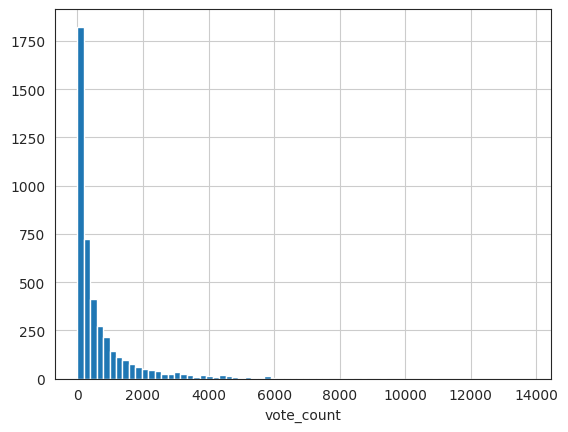

In [289]:
ax = data['vote_count'].hist(bins=70)
ax.set_xlabel('vote_count')

Text(0.5, 0, 'runtime')

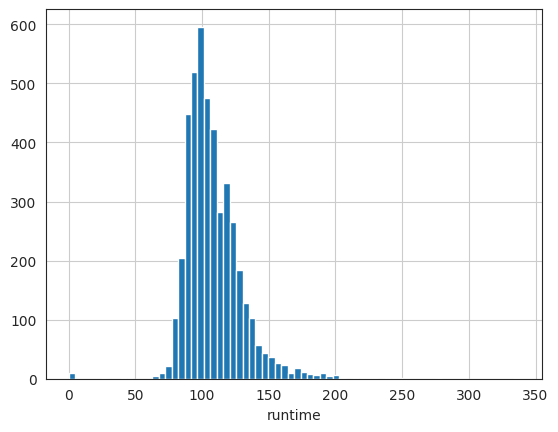

In [290]:
#We can see that movie ratings follow a gaussian distribution, most movies are rated between 5.5-6.5
ax = data['runtime'].hist(bins=70)
ax.set_xlabel('runtime')

Text(0.5, 0, 'vote_average')

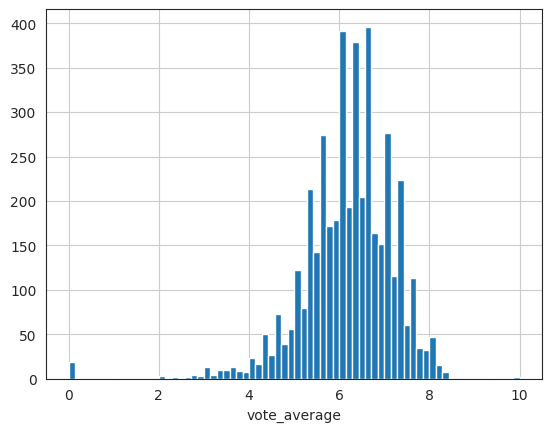

In [291]:
ax = data['vote_average'].hist(bins=70)
ax.set_xlabel('vote_average')


#**Creating Recommendation System**


In [292]:
#CountVectorizer vectorizes our movie summary col by counting frequency of words while ignoring stopwords
#cosine_similarity is our similarity score function
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [293]:
count_vectorizer = CountVectorizer(max_features= 5000, stop_words="english")
count_vectorizer.fit_transform(clean_data["summary"]).toarray().shape
cv = count_vectorizer.fit_transform(clean_data["summary"]).toarray()
cv.shape

(4383, 5000)

In [294]:
#Creates a similarity matrix based on the vectorized meta-data
cs = cosine_similarity(count_matrix)
cs.shape
cs

array([[1.        , 0.08066786, 0.04713309, ..., 0.02676259, 0.0072403 ,
        0.01275205],
       [0.08066786, 1.        , 0.03718183, ..., 0.02902924, 0.03141404,
        0.00922139],
       [0.04713309, 0.03718183, 1.        , ..., 0.0215872 , 0.01557375,
        0.        ],
       ...,
       [0.02676259, 0.02902924, 0.0215872 , ..., 1.        , 0.        ,
        0.        ],
       [0.0072403 , 0.03141404, 0.01557375, ..., 0.        , 1.        ,
        0.03476173],
       [0.01275205, 0.00922139, 0.        , ..., 0.        , 0.03476173,
        1.        ]])

In [295]:
clean_data = clean_data.reset_index()

In [296]:
indices = pd.Series(clean_data.index, index = clean_data['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
Bang                                        4378
Primer                                      4379
El Mariachi                                 4380
Signed, Sealed, Delivered                   4381
My Date with Drew                           4382
Length: 4383, dtype: int64

In [297]:

def get_recommendations(title, cosine_sim=cs):
    #get the index of the movie title
    idx = indices[title]
    #gets a list of similarities score based on movie title index
    scores = list(enumerate(cosine_sim[idx]))
    #sorts the score from descending order
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    #ignores the first movie as that is the input movie ie(score = 1) and grabs the next 10 movie indices
    scores = scores[1:11]
    movies_indices = [ind[0] for ind in scores]
    #Retrieves movie titles based ib the score matrix indices
    movies = clean_data["title"].iloc[movies_indices]
    return movies


In [298]:
title = input("Enter Movie Title:\n")
print("Here are 10 movies similar to {}".format(title) + "\n")
print(get_recommendations(title, cs))

Enter Movie Title:
Avatar
Here are 10 movies similar to Avatar

65               The Dark Knight
3785                   Idiocracy
47       Star Trek Into Darkness
3          The Dark Knight Rises
147                   Armageddon
216                 Jason Bourne
120     X-Men Origins: Wolverine
71                 Suicide Squad
108                 Pearl Harbor
1569                  Step Up 3D
Name: title, dtype: object
